In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

np.random.seed(42)
random.seed(42)

In [12]:
# Задание 1
# Для выполнения этого задания требуется сгенерировать DataFrame с синтетическими данными. 
# DataFrame должен состоять из 10000 строк и 5 колонок. 
# Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:

# 1-я колонка – user_id – идентификатор пользователя. Длина user_id должна равняться 15-ти символам. 
# Идентификатор состоит из случайной комбинации следующих символов: "1234567890abcdefghijk". 
# Для каждой строки в DataFrame значение user_id формируются случайным образом.

# 2-я колонка – order_number – номер заказа. Столбец необходимо заполнить случайными значениями в диапазоне от 1 до 10.

# 3-я колонка – click2delivery – время, прошедшее с момента оформления заказа до вручения клиенту. 
# Столбец необходимо заполнить случайными значениями из нормального распределения со средним 1440 
# и стандартным отклонением 200.

# 4-я колонка – order_items_sum – общая стоимость заказа. 
# Значения для этого столбца необходимо взять из экспоненциального распределения с параметром λ = 1, смещённого на +1.

# 5-я колонка – retention – день жизни покупателя, в который он совершил заказ. 
# Необходимо сгенерировать значения 1, 2, 3, 4, 5 с вероятностями 0.35, 0.25, 0.2, 0.15 и 0.05 соответственно.

# В случае, если в колонке user_id встречаются дублирующиеся значения, оставь только первое из них.

In [13]:
def generate_user_id():
    characters = "1234567890abcdefghijk"
    return ''.join(random.choice(characters) for _ in range(15))

def generate_df(n):
    data = {
        'user_id' : [generate_user_id() for _ in range(n)],
        'order_number' : np.random.randint(1, 11, size=n),
        'click2delivery' : np.random.normal(1440, 200, size=n),
        'order_items_sum' : np.random.exponential(1, size=n) + 1,
        'retention' : np.random.choice([1, 2, 3, 4, 5], size=n, p=[0.35, 0.25, 0.2, 0.15, 0.05])
    }
    df = pd.DataFrame(data)
    return df

df = pd.DataFrame()
n = 10_000

while n:
    new_df = generate_df(n)
    df = pd.concat([df, new_df])
    df = df.drop_duplicates(subset='user_id', keep='first')
    n = 10_000 - len(df)

df.head()

,user_id,order_number,click2delivery,order_items_sum,retention
0,k4198854h3id213,7,1198.160258,1.010227,1
1,78gj1h7khd8ei91,4,1451.348337,2.189504,1
2,6da957a43c4bbj9,8,1462.691208,1.968382,1
3,2eh4c3h0kjbi732,5,1477.167526,2.035588,2
4,80384c9ekb6bb79,7,1623.974303,1.469017,2


In [14]:
# Задание 2
# Для всех строк исходного датасета, сгруппированных по номеру заказа, 
# посчитать среднее значение времени доставки по группе.

# Результат необходимо добавить в новый столбец датафрейма.

In [15]:
orders = (
    df.groupby('order_number')['click2delivery']
    .agg(mean_time = 'mean') \
    .reset_index()
)
orders

,order_number,mean_time
0,1,1443.937094
1,2,1442.508835
2,3,1435.860172
3,4,1444.343693
4,5,1441.499895
5,6,1442.861916
6,7,1439.866081
7,8,1443.426737
8,9,1431.180554
9,10,1444.398974


In [16]:
df = df.merge(orders, how = 'inner', left_on = 'order_number', right_on = 'order_number')
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time
0,k4198854h3id213,7,1198.160258,1.010227,1,1439.866081
1,80384c9ekb6bb79,7,1623.974303,1.469017,2,1439.866081
2,e5958hh9idicb85,7,1316.771308,2.666632,1,1439.866081
3,hdj5866d16ad896,7,1277.894274,1.457489,5,1439.866081
4,1007dijkaeee7gf,7,1192.082397,1.650405,5,1439.866081


In [17]:
# Задание 3
# Отдельной колонкой добавить значения последовательности, начинающейся с 0 и 1, 
# где каждый следующий элемент является суммой двух предыдущих, умноженных на 0.5.

In [18]:
arr = [0, 1]

while len(arr) < 10_000:
    arr.append(sum(arr[-2:]) * 0.5)

# алгоритм Фиббоначи
df['seq'] = arr
df.head(20)

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time,seq
0,k4198854h3id213,7,1198.160258,1.010227,1,1439.866081,0.000000
1,80384c9ekb6bb79,7,1623.974303,1.469017,2,1439.866081,1.000000
2,e5958hh9idicb85,7,1316.771308,2.666632,1,1439.866081,0.500000
3,hdj5866d16ad896,7,1277.894274,1.457489,5,1439.866081,0.750000
4,1007dijkaeee7gf,7,1192.082397,1.650405,5,1439.866081,0.625000
5,14d86ge2h84e5eg,7,1583.268016,1.740325,5,1439.866081,0.687500
6,db3gka1df4dbke5,7,1336.630623,1.329700,4,1439.866081,0.656250
7,4e4k5f0g9dff8eh,7,1353.540964,1.115808,1,1439.866081,0.671875
8,k20e2ib530ad675,7,1043.607103,5.182626,1,1439.866081,0.664062
9,da9b5f3333d4b5h,7,1663.778920,2.442582,2,1439.866081,0.667969


In [19]:
# Задание 4
# Напиши функцию, которая принимает на вход значение user_id и возвращает строку следующего вида: 
# все буквы в той последовательности, в которой они встречаются в user_id, затем квадрат числа, 
# полученного из всех цифр в user_id в той последовательности, в которой они встречаются в user_id.

# Добавь результат применения этой функции к user_id в новый столбец. Использование циклов вне функции запрещено.

In [20]:
def process_user_id(user_id):
    letters = ''.join(filter(str.isalpha, user_id))
    digits = ''.join(filter(str.isdigit, user_id))
    
    return f'{letters}{int(digits) ** 2}'

df['transformed_user_id'] = df['user_id'].apply(process_user_id)
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time,seq,transformed_user_id
0,k4198854h3id213,7,1198.160258,1.010227,1,1439.866081,0.000,khid1763037761149968363369
1,80384c9ekb6bb79,7,1623.974303,1.469017,2,1439.866081,1.000,cekbbb646174306428403041
2,e5958hh9idicb85,7,1316.771308,2.666632,1,1439.866081,0.500,ehhidicb35509502230225
3,hdj5866d16ad896,7,1277.894274,1.457489,5,1439.866081,0.750,hdjdad344119382672674816
4,1007dijkaeee7gf,7,1192.082397,1.650405,5,1439.866081,0.625,dijkaeeegf101545929


In [21]:
# Задание 5
# Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов click2delivery, order_items_sum 
# и retention. Построй гистограммы распределения значений в столбцах.

In [22]:
rounded_df = df.copy()

rounded_df[['click2delivery', 'order_items_sum', 'retention']] = rounded_df[['click2delivery', 'order_items_sum', 'retention']].astype(int)
rounded_df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time,seq,transformed_user_id
0,k4198854h3id213,7,1198,1,1,1439.866081,0.000,khid1763037761149968363369
1,80384c9ekb6bb79,7,1623,1,2,1439.866081,1.000,cekbbb646174306428403041
2,e5958hh9idicb85,7,1316,2,1,1439.866081,0.500,ehhidicb35509502230225
3,hdj5866d16ad896,7,1277,1,5,1439.866081,0.750,hdjdad344119382672674816
4,1007dijkaeee7gf,7,1192,1,5,1439.866081,0.625,dijkaeeegf101545929


In [25]:
describe_df = df[['click2delivery', 'order_items_sum', 'retention']].describe() \
    .loc[['mean', '50%', 'std']]

In [26]:
modes = rounded_df[['click2delivery', 'order_items_sum', 'retention']].mode() \
    .head(1) \
    .set_index(pd.Index(['mode']))

pd.concat([describe_df, modes])

,click2delivery,order_items_sum,retention
mean,1441.003580,1.997569,2.294100
50%,1440.085797,1.698760,2.000000
std,201.296013,0.997145,1.231973
mode,1446.000000,1.000000,1.000000


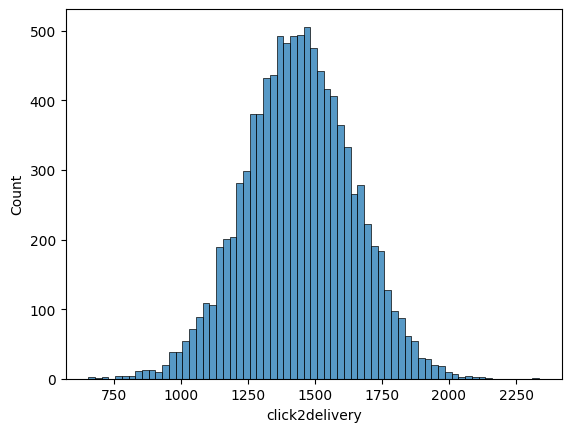

In [27]:
sns.histplot(df['click2delivery']);

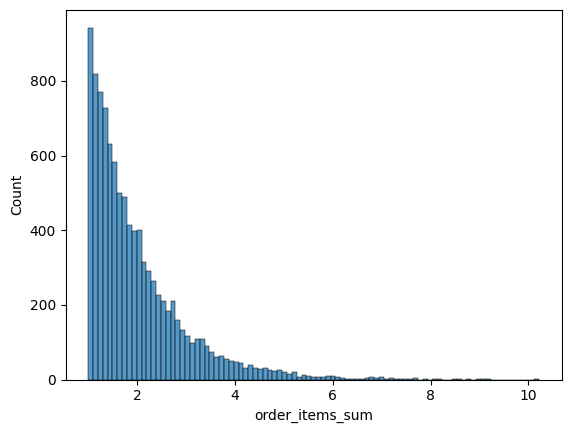

In [28]:
sns.histplot(df['order_items_sum']);

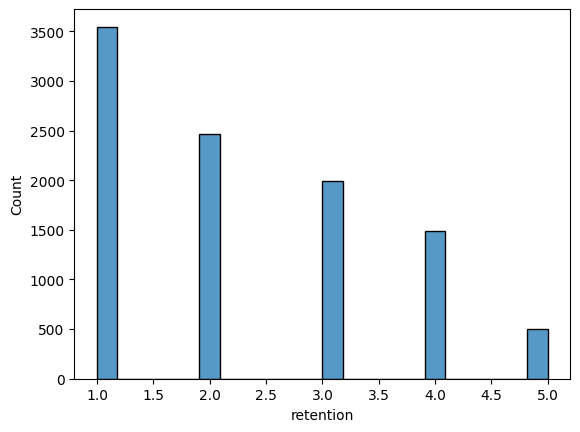

In [29]:
sns.histplot(df['retention']);

In [30]:
# Задание 6
# Построй график, который наиболее полно, на твой взгляд, описывает зависимость времени доставки заказа от его номера. 
# Обоснуй, почему ты так считаешь?

In [31]:
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time,seq,transformed_user_id
0,k4198854h3id213,7,1198.160258,1.010227,1,1439.866081,0.000,khid1763037761149968363369
1,80384c9ekb6bb79,7,1623.974303,1.469017,2,1439.866081,1.000,cekbbb646174306428403041
2,e5958hh9idicb85,7,1316.771308,2.666632,1,1439.866081,0.500,ehhidicb35509502230225
3,hdj5866d16ad896,7,1277.894274,1.457489,5,1439.866081,0.750,hdjdad344119382672674816
4,1007dijkaeee7gf,7,1192.082397,1.650405,5,1439.866081,0.625,dijkaeeegf101545929


In [32]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

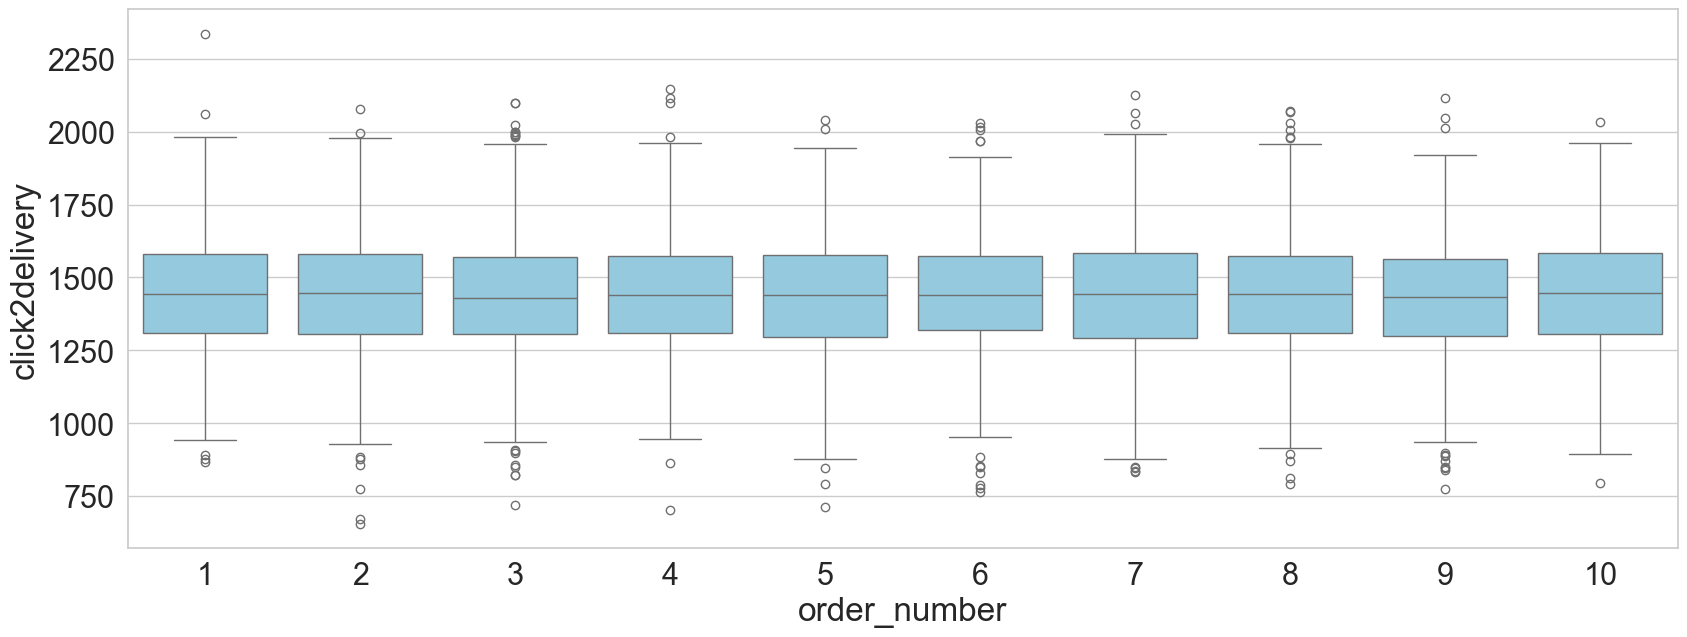

In [35]:
sns.boxplot(data = df[['click2delivery', 'order_number']], x = 'order_number', y = 'click2delivery', color='skyblue');